In [9]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/Users/admin/DBS_Assisgnments/Sem 2/DeepLearning/CA01')
AudioData='Data'

In [23]:
from pydub import AudioSegment 
from pydub.utils import make_chunks
import os

def process_audio(file_Name,dir,files):
  myaudio = AudioSegment.from_file(file_Name, "wav") 
  chunk_length_ms =  3000 # pydub calculates in millisec 
  chunks = make_chunks(myaudio,chunk_length_ms) #Make chunks of one sec 
  if not os.path.exists(os.path.join('chunked',dir)):
    os.makedirs(os.path.join('chunked',dir))
  for j, chunk in enumerate(chunks):
    fil = files.strip('.wav')
    chunk_name = './chunked/'+ dir +'/' + fil + "_{0}.wav".format(j)  
    chunk.export(chunk_name, format="wav") 
  print ("exported files:", len(chunk_name))

all_file_names = os.listdir()

try:
    os.makedirs('chunked') # creating a folder named chunked
except:
    pass

for subdir, dirs, files in os.walk(AudioData):
  for dir in dirs:
    for each_file in os.listdir(os.path.join(subdir, dir)):
      if ('.wav' in each_file):
        process_audio(os.path.join(subdir,dir,each_file),dir,each_file)

exported files: 43
exported files: 43
exported files: 43
exported files: 42
exported files: 42
exported files: 42
exported files: 43
exported files: 45


In [2]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import librosa
from pydub import AudioSegment
import numpy as np
import IPython.display as ipd
from sklearn.preprocessing import MinMaxScaler


In [72]:
def feature(fileName):
  x, sr = librosa.load(fileName)
  data = librosa.feature.mfcc(x) #, sr=sr, n_mfcc = 40)
  #scaler = MinMaxScaler(feature_range=(0, 1))
  #scaler = scaler.fit(data)
  #data = scaler.transform(data)
  flat = data.flatten()
  return flat

In [10]:
import json
import pandas as pd
import os, glob

in_lang = 'German'
out_lang = 'English'
chunk = 'chunked'

Input=[]
Output=[]
in_file=[]
out_file=[]
input_df = pd.DataFrame()
output_df = pd.DataFrame()

dirs = ['chunked/Input','chunked/Output']
tot_file = 0

for subdir, dirs, files in os.walk(chunk):
  try:
    for each_file in os.listdir(os.path.join(subdir, dirs[0])):
      if ('.wav' in each_file):
        in_file.append(each_file)
        Input.append(feature(os.path.join(subdir,dirs[0],each_file)))      
        input_df = input_df.append(pd.DataFrame([feature(os.path.join(subdir,dirs[0],each_file))]), ignore_index=True)
        out1 = dirs[0].replace("Input", "Output")
        out = each_file.replace(in_lang,out_lang)
        out_file.append(out)
        Output.append(feature(os.path.join(subdir,out1,out)))
        output_df = output_df.append(pd.DataFrame([feature(os.path.join(subdir,out1,out))]), ignore_index=True)
        tot_file+=1
  except Exception as e:
    print(e)
print('Done',tot_file)

list index out of range
list index out of range
list index out of range
Done 3364


In [11]:
def show_data(data):
    plt.figure()
    plt.title("data")
    plt.plot(data)
    plt.show()

In [ ]:
feature=[]
for i in range(len(Output)):
  feature.append([in_file[i],Input[i],out_file[i],Output[i]])

feat_df = pd.DataFrame(feature, columns=['InFileName','Input','OutFileName','Output'])
feat_df.head()

In [18]:
print(input_df.isnull().sum().sum())
new_input_df=input_df.fillna(input_df.mean())
print(new_input_df.isnull().sum().sum())

260060
0


In [19]:
print(output_df.isnull().sum().sum())
new_output_df=output_df.fillna(output_df.mean())
print(new_output_df.isnull().sum().sum())

224080
0


before transform  [-364.49042 -337.02637 -340.17822 -340.4748  -332.82196 -326.30634
 -330.312   -327.51733 -319.26215 -317.749  ]


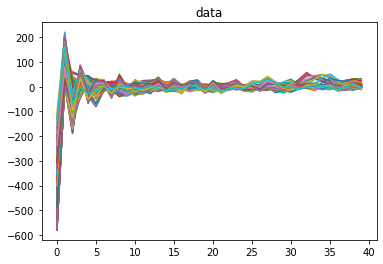

mfcc shape  (40, 130)


In [45]:
from sklearn.preprocessing import MinMaxScaler

Sample1 = 'chunked/Test/Harry_English_part_4_12.wav'

in_x, sr = librosa.load(Sample1)
data = librosa.feature.mfcc(in_x, sr=sr, n_mfcc = 40)
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = scaler.fit(data)
#data = scaler.transform(data)
print('before transform ', data[0][:10])

show_data(data)
ipd.Audio(in_x, rate=sr)
print('mfcc shape ', data.shape)

In [46]:
ipd.Audio(in_x, rate=sr)

In [47]:
# Load files
audio_segment = AudioSegment.from_file(Sample1)

# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 3000
Frame count: 132300.0
Intensity: -22.239724672288006


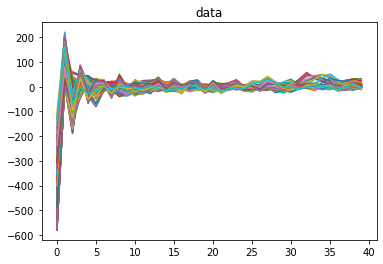

In [48]:
show_data(data)

(40, 130)


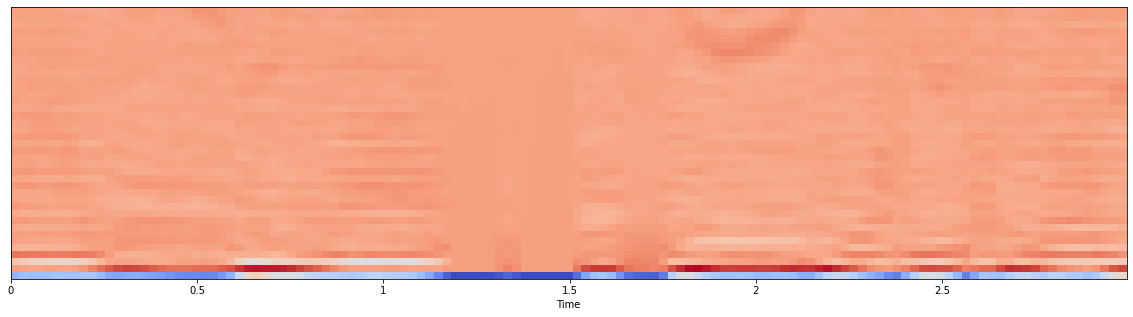

In [49]:
# MFCC
plt.figure(figsize=(20,5))
mfcc_1 = librosa.feature.mfcc(in_x, sr=sr, n_mfcc = 40)
print(mfcc_1.shape)

librosa.display.specshow(mfcc_1, sr=sr, x_axis='time')

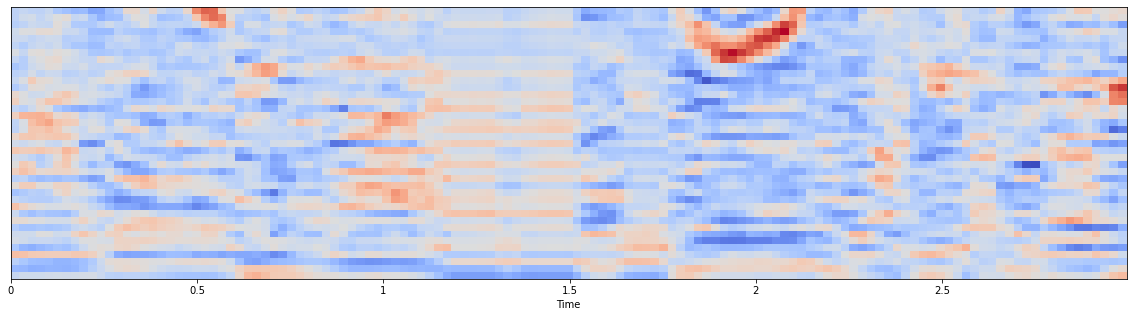

In [50]:
mfccs = sklearn.preprocessing.scale(mfcc_1, axis=1)
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [51]:
print(mfccs)

[[-0.08287045  0.15127584  0.12440451 ...  1.5837622   1.8619285
   1.9018074 ]
 [-1.2137789  -1.2998819  -1.486457   ...  0.50982404  0.8411369
   0.8746852 ]
 [-0.39796025 -0.78245217 -1.0690686  ... -0.8183936  -0.73031783
  -0.22201116]
 ...
 [-0.30207062  0.13861397  0.22295508 ...  0.9905671   0.6572843
  -0.18124366]
 [-0.3181724  -0.11107625 -0.2876631  ...  0.75939745  0.91133696
   1.0576063 ]
 [ 0.08549345 -0.2545021  -0.14704542 ... -0.6966078  -1.1013325
  -0.85311097]]


[Text(0.5, 1.0, 'log Power spectrogram')]

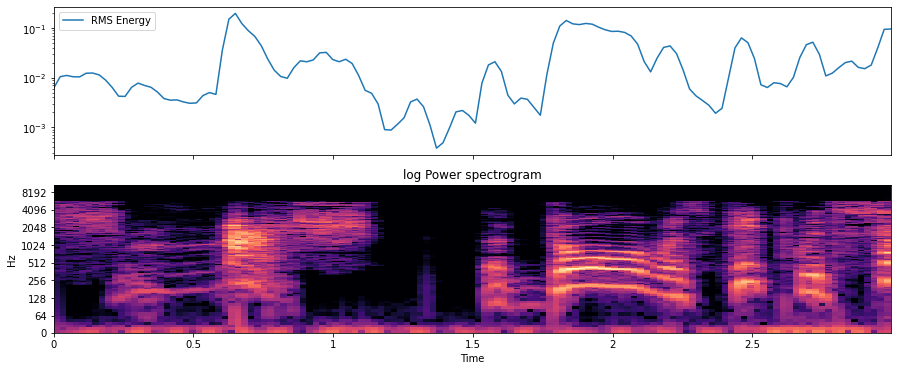

In [52]:
S, phase = librosa.magphase(librosa.stft(in_x))
rms = librosa.feature.rms(S=S)
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [53]:
print(mfcc_1.shape)

(40, 130)


In [54]:
flat = mfcc_1.flatten()
print(flat.shape)

(5200,)


In [55]:
print(feat_df.shape)

(3364, 4)


In [56]:
print(feat_df.iloc[0])

InFileName                          Harry_English_part_3_274.wav
Input          [-260.09488, -225.0568, -219.16434, -225.21635...
OutFileName                         Harry_English_part_3_274.wav
Output         [-260.09488, -225.0568, -219.16434, -225.21635...
Name: 0, dtype: object


In [13]:
from keras.layers import Dense, Conv1D, Flatten, Input,Activation, Dropout, LSTM,GRU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split


In [23]:
X = new_input_df
y = new_output_df

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [79]:
print('Input type: ',type(X_train[1]))
print('Input size: ',X_train.shape[1])
print(X_train.shape)
#print('Data',X_train)

Input type:  <class 'pandas.core.series.Series'>
Input size:  2600
(2691, 2600)


In [30]:
in_shape = X_train.shape[1]
out_shape = Y_train.shape[1]
opt = Adam(lr=0.0001)

#Sequential Model 
model = Sequential()
model.add(Conv1D(256, kernel_size=10, input_shape=(in_shape,1)))
model.add(GRU(256, activation='relu'))
model.add(Dense(256, activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(out_shape))

# compiling the sequential model
model.compile(loss="mean_squared_error", metrics=['mean_squared_error'], optimizer=opt)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2591, 256)         2816      
                                                                 
 gru (GRU)                   (None, 256)               394752    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 2600)              668200    
                                                                 
Total params: 1,131,560
Trainable params: 1,131,560
Non-trainable params: 0
_________________________________________________________________


In [27]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'continuous-multioutput'

In [37]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

epochs = 2; batch_size = 50

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=True, validation_data=(X_test, Y_test))

Epoch 1/2
54/54 [==============================] - 445s 8s/step - loss: 7068.3135 - mean_squared_error: 7068.3135 - val_loss: 2962.9041 - val_mean_squared_error: 2962.9041
Epoch 2/2
54/54 [==============================] - 409s 8s/step - loss: 2247.2407 - mean_squared_error: 2247.2407 - val_loss: 2128.8462 - val_mean_squared_error: 2128.8462


In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['mean_squared_error']
    val_acc = history.history['val_mean_squared_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training mse')
    plt.plot(x, val_acc, 'r', label='Validation msc')
    plt.title('Training and validation MSE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

85/85 [==============================] - 115s 1s/step - loss: 2062.3096 - mean_squared_error: 2062.3096
Training MSE: 2062.3096
Training RMSE 45.41265870120907
22/22 [==============================] - 27s 1s/step - loss: 2128.8459 - mean_squared_error: 2128.8459
Testing MSE:  2128.8459
Testing RMSE 46.13941858395731


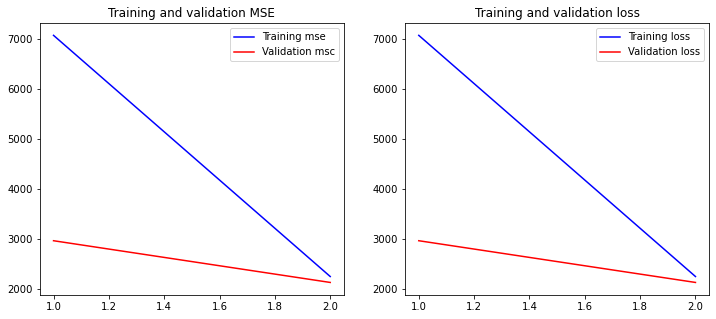

In [42]:
from sklearn.metrics import mean_squared_error

#print("MSE",mean_squared_error(Y_test,Y_pred))
#print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

loss, train_mse = model.evaluate(X_train, Y_train, verbose=True)
print("Training MSE: {:.4f}".format(train_mse))
print("Training RMSE",np.sqrt(train_mse))
loss, test_mse = model.evaluate(X_test, Y_test, verbose=True)
print("Testing MSE:  {:.4f}".format(test_mse))
print("Testing RMSE",np.sqrt(test_mse))
plot_history(history)

In [93]:
!pip3 install h5py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [43]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [44]:
from keras.models import model_from_json
os.chdir('/Users/admin/DBS_Assisgnments/Sem 2/DeepLearning/CA01')
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [65]:
# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error']) #'rmsprop'
score = loaded_model.evaluate(X_test, Y_test, verbose=0)

In [69]:
print("%s: %.2f" % (loaded_model.metrics_names[1], score[1]))
print("%s: %.2f" % ('RMSE', np.sqrt(score[1])))

mean_squared_error: 2128.85
RMSE: 46.14


In [70]:
test_1 = 'chunked/Test/Harry_English_part_2_100.wav'
pred_1 =  'chunked/Test/Harry_German_part_2_100.wav'

In [102]:
#test1 =[]
#pred1 = []
test1 = pd.DataFrame()
pred1 = pd.DataFrame()
for i in range(1):
    test1 = test1.append(pd.DataFrame([feature(test_1)]), ignore_index=True)
    pred1 = pred1.append(pd.DataFrame([feature(pred_1)]), ignore_index=True)
    #test1.append(feature(test_1))
    #pred1.append(feature(pred_1))

In [104]:
test1.shape

(1, 2600)

In [121]:
import time 
start = time.time()
#print('Before :', start)
pred11 = loaded_model.predict(test1)
print('Time taken to process :', time.time()-start)

Time taken to process : 0.33551883697509766


In [108]:
deFlat =  np.reshape(pred11,(20,130))

In [109]:
deFlat.shape

(20, 130)

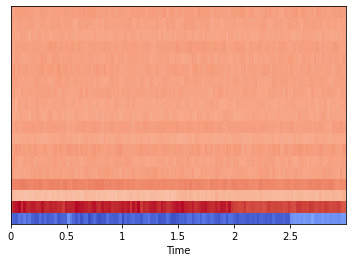

In [110]:
librosa.display.specshow(deFlat, sr=sr, x_axis='time')

In [114]:
recovered = librosa.feature.inverse.mfcc_to_audio(deFlat ,n_mels=20)

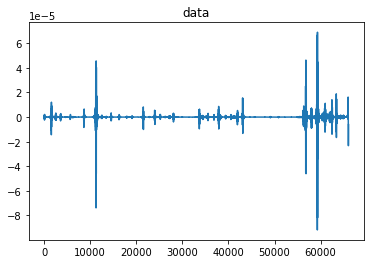

In [117]:
#x, sr = librosa.load(pred_1)
data = librosa.feature.mfcc(recovered)
wav1 = librosa.feature.inverse.mfcc_to_audio(data, n_mels = 20)
show_data(wav1)
ipd.Audio(recovered, rate=sr)

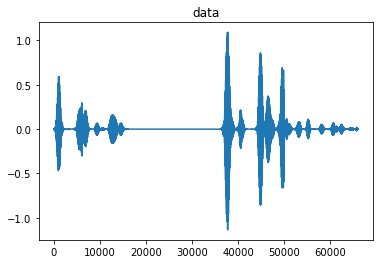

In [112]:
x, sr = librosa.load(pred_1)
data = librosa.feature.mfcc(x)
wav = librosa.feature.inverse.mfcc_to_audio(data, n_mels = 20)
show_data(wav)
ipd.Audio(wav, rate=sr)

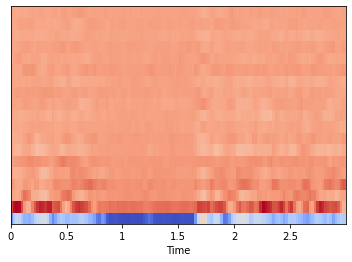

In [113]:
librosa.display.specshow(data, sr=sr, x_axis='time')

In [ ]:
def shap(dat,sha1,sha2):
  dat = dat.to_numpy()
  dat = dat.reshape(dat.shape[0], dat.shape[1], sha2)
  print(dat.shape)
  return dat

X_train, X_test, Y_train, Y_test = train_test_split(feat_df['Input'], feat_df['Output'], test_size=0.1)

X_train = np.asarray(X_train).astype(np.float32) #, dtype=np.float32) #shap(X_train,128,1)
X_test = np.asarray(X_test).astype(np.float32) #, dtype=np.float32) #shap(X_test,128,1)
Y_train = np.asarray(Y_train).astype(np.float32) #, dtype=np.float32) #shap(Y_train,128,1)
Y_test = np.asarray(Y_test).astype(np.float32)   #, dtype=np.float32) #shap(Y_test,128,1) 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint


seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
	model = Sequential()
	model.add(Conv1D(256, kernel_size=5, input_shape=(X_train.shape[1],1)))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
	checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
	checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
	callbacks_list = [checkpoint]
	# Fit the model
	model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1])) #*100))
	cvscores.append(scores[1])# * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
n_outputs = X_train.shape[1]
opt = Adam(lr=0.0001)


model = Sequential()
model.add(Conv1D(256, kernel_size=5, input_shape=(X_train.shape[1],1)))

#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
model.add(LSTM(256, activation='relu', input_shape=(X_train.shape[1],1)))
#model.add(LSTM(256,activation='relu',))
#model.add(Dropout(0.1))
#model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(n_outputs))
# compiling the sequential model
model.compile(loss="mean_absolute_error", metrics=['mean_squared_error'], optimizer=opt)
model.summary()

In [ ]:
loss, msc = model.evaluate(X_train, Y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(msc))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)